In [89]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import losses
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,softmax,sigmoid
from tensorflow.keras.optimizers import Adam
import os
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


DataBaseden veri çekmek.
Environment yüklemek.

In [90]:
from dotenv import load_dotenv  # python-dotenv kütüphanesini import edin

load_dotenv("/Users/enesdemir/Desktop/financeProject/.venv/.env")

True

In [91]:
password = os.getenv("MYSQL_PASSWORD")

db = mysql.connector.connect(
    host="localhost",
    user="root",  
    password=f"{password}",
    database="finance"  
)

cursor = db.cursor()

In [92]:
query = """
    SELECT 
        timestampp,
        open_price,
        high_price,
        low_price,
        close_price,
        volume
    FROM
        stock_data
ORDER BY 
	timestampp;
"""

cursor.execute(query)
answer = cursor.fetchall()
cursor.close()

True

Veriyi numpy dizisine çevirme.

In [93]:
train_x =[]
train_y =[]

for row in answer:
    row_data = np.array([
        row[0].timestamp(),
        float(row[1]),
        float(row[2]),
        float(row[3]),
        float(row[4]),
        int(row[5])
    ])
    row_data2 = np.array([

    ])
    train_x.append(row_data)

train_x = pd.DataFrame(train_x)


In [94]:
print(train_x)

                 0       1       2       3       4      5
0     1.735175e+09  224.60  224.60  223.90  224.41  355.0
1     1.735175e+09  224.41  224.70  224.02  224.59   47.0
2     1.735175e+09  224.59  224.59  223.97  224.59  221.0
3     1.735176e+09  224.59  224.65  224.19  224.19   39.0
4     1.735176e+09  224.57  224.59  223.28  224.59   19.0
...            ...     ...     ...     ...     ...    ...
3256  1.737736e+09  224.62  224.80  224.62  224.79   12.0
3257  1.737736e+09  224.80  224.80  224.80  224.80    7.0
3258  1.737737e+09  224.60  224.60  224.60  224.60    4.0
3259  1.737737e+09  224.62  224.62  224.62  224.62    4.0
3260  1.737738e+09  224.78  224.78  224.78  224.78    5.0

[3261 rows x 6 columns]


In [95]:
train_x.head()

,0,1,2,3,4,5
0,1.735175e+09,224.60,224.60,223.90,224.41,355.0
1,1.735175e+09,224.41,224.70,224.02,224.59,47.0
2,1.735175e+09,224.59,224.59,223.97,224.59,221.0
3,1.735176e+09,224.59,224.65,224.19,224.19,39.0
4,1.735176e+09,224.57,224.59,223.28,224.59,19.0


In [96]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3261 non-null   float64
 1   1       3261 non-null   float64
 2   2       3261 non-null   float64
 3   3       3261 non-null   float64
 4   4       3261 non-null   float64
 5   5       3261 non-null   float64
dtypes: float64(6)
memory usage: 153.0 KB


In [97]:
train_x.describe()

,0,1,2,3,4,5
count,3.261000e+03,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03
mean,1.736484e+09,221.982142,222.163364,221.776433,221.973394,3.474808e+04
std,7.675576e+05,2.562566,2.561051,2.588305,2.571227,1.627297e+05
min,1.735175e+09,215.058500,215.345000,214.610000,215.000000,1.000000e+00
25%,1.735823e+09,220.000000,220.188600,219.820000,220.000000,2.300000e+01
50%,1.736489e+09,222.660000,222.810000,222.470000,222.660000,1.387000e+03
75%,1.737077e+09,224.030000,224.240000,223.880000,224.040000,1.996800e+04
max,1.737738e+09,227.200000,228.598800,226.720000,227.240000,3.216348e+06


In [98]:
train_x.isna()

,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3256,False,False,False,False,False,False
3257,False,False,False,False,False,False
3258,False,False,False,False,False,False
3259,False,False,False,False,False,False


In [99]:
train_x.ffill(inplace=True)  

In [100]:
train_x.describe()

,0,1,2,3,4,5
count,3.261000e+03,3261.000000,3261.000000,3261.000000,3261.000000,3.261000e+03
mean,1.736484e+09,221.982142,222.163364,221.776433,221.973394,3.474808e+04
std,7.675576e+05,2.562566,2.561051,2.588305,2.571227,1.627297e+05
min,1.735175e+09,215.058500,215.345000,214.610000,215.000000,1.000000e+00
25%,1.735823e+09,220.000000,220.188600,219.820000,220.000000,2.300000e+01
50%,1.736489e+09,222.660000,222.810000,222.470000,222.660000,1.387000e+03
75%,1.737077e+09,224.030000,224.240000,223.880000,224.040000,1.996800e+04
max,1.737738e+09,227.200000,228.598800,226.720000,227.240000,3.216348e+06


In [101]:
train_x.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3256    False
3257    False
3258    False
3259    False
3260    False
Length: 3261, dtype: bool

In [102]:
train_x.head(100)

,0,1,2,3,4,5
0,1.735175e+09,224.60,224.60,223.90,224.4100,355.0
1,1.735175e+09,224.41,224.70,224.02,224.5900,47.0
2,1.735175e+09,224.59,224.59,223.97,224.5900,221.0
3,1.735176e+09,224.59,224.65,224.19,224.1900,39.0
4,1.735176e+09,224.57,224.59,223.28,224.5900,19.0
...,...,...,...,...,...,...
95,1.735206e+09,224.96,225.21,224.96,225.1148,11510.0
96,1.735206e+09,225.16,225.23,224.79,225.1500,34832.0
97,1.735207e+09,225.14,225.14,224.75,224.8800,12330.0
98,1.735207e+09,224.89,224.89,224.58,224.7650,10043.0


In [103]:
train_x.columns =['timestampp','open_price','high_price','low_price','close_price','volume'] 

In [104]:
train_x.columns

Index(['timestampp', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume'],
      dtype='object')

In [105]:
train_x.sort_values(by='timestampp',inplace=True)

In [106]:
train_x.head(100)

,timestampp,open_price,high_price,low_price,close_price,volume
0,1.735175e+09,224.60,224.60,223.90,224.4100,355.0
1,1.735175e+09,224.41,224.70,224.02,224.5900,47.0
2,1.735175e+09,224.59,224.59,223.97,224.5900,221.0
3,1.735176e+09,224.59,224.65,224.19,224.1900,39.0
4,1.735176e+09,224.57,224.59,223.28,224.5900,19.0
...,...,...,...,...,...,...
95,1.735206e+09,224.96,225.21,224.96,225.1148,11510.0
96,1.735206e+09,225.16,225.23,224.79,225.1500,34832.0
97,1.735207e+09,225.14,225.14,224.75,224.8800,12330.0
98,1.735207e+09,224.89,224.89,224.58,224.7650,10043.0


In [107]:
train_x["avg_volume_in_one_day"] = train_x.groupby("timestampp")['volume'].transform('mean')

In [108]:
train_x["sum_volume_in_one_day"] = train_x.groupby("timestampp")['volume'].transform('sum')

In [109]:
train_x.columns

Index(['timestampp', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'avg_volume_in_one_day', 'sum_volume_in_one_day'],
      dtype='object')

In [110]:
train_x["avg_salary_one_day"] = (((train_x.groupby('timestampp')['high_price'].transform('max'))+(train_x.groupby('timestampp')['low_price'].transform('min')))/2)*train_x.sum_volume_in_one_day

In [111]:
train_x.columns

Index(['timestampp', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'avg_volume_in_one_day', 'sum_volume_in_one_day',
       'avg_salary_one_day'],
      dtype='object')

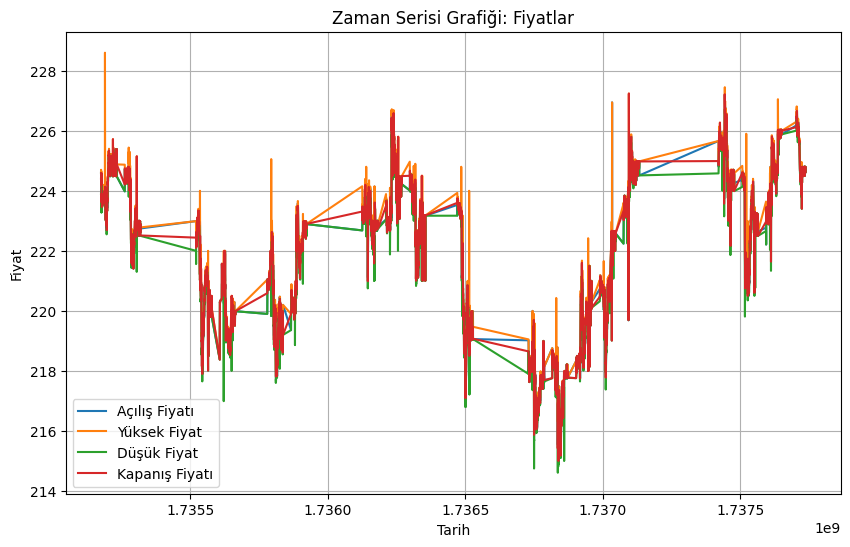

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestampp', y='open_price', data=train_x, label='Açılış Fiyatı')
sns.lineplot(x='timestampp', y='high_price', data=train_x, label='Yüksek Fiyat')
sns.lineplot(x='timestampp', y='low_price', data=train_x, label='Düşük Fiyat')
sns.lineplot(x='timestampp', y='close_price', data=train_x, label='Kapanış Fiyatı')
plt.title('Zaman Serisi Grafiği: Fiyatlar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()

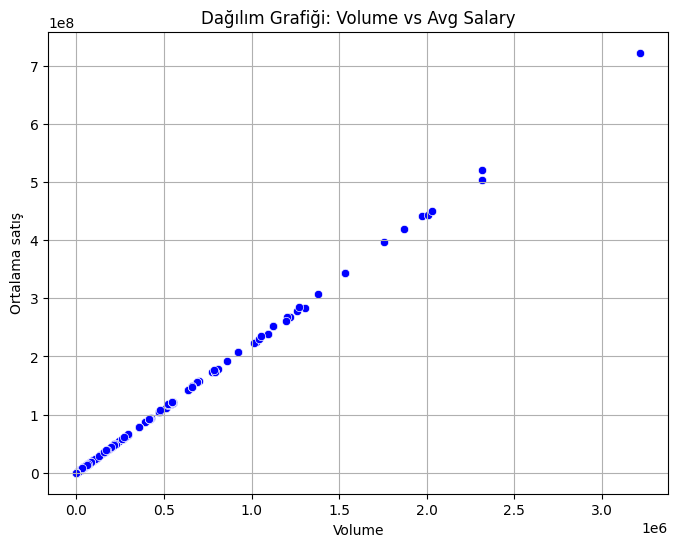

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volume', y='avg_salary_one_day', data=train_x, color='blue')
plt.title('Dağılım Grafiği: Volume vs Avg Salary')
plt.xlabel('Volume')
plt.ylabel('Ortalama satış')
plt.grid(True)
plt.show()

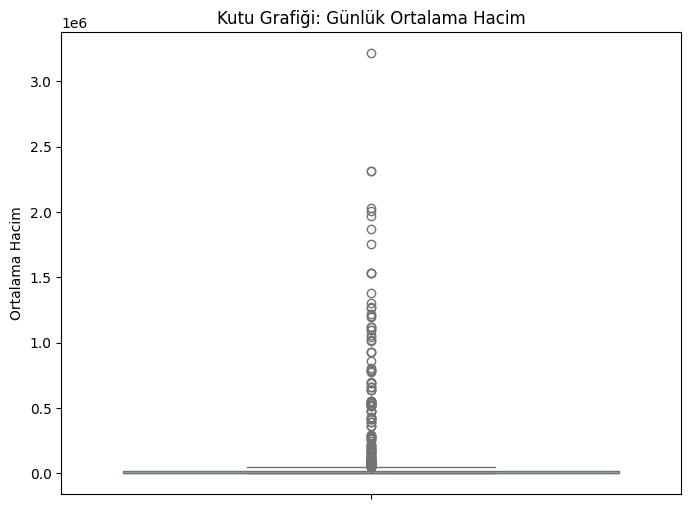

In [114]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='avg_volume_in_one_day', data=train_x, color='lightgreen')
plt.title('Kutu Grafiği: Günlük Ortalama Hacim')
plt.ylabel('Ortalama Hacim')
plt.show()

In [115]:
train_x.drop(train_x[train_x["avg_volume_in_one_day"] > 2.0 * 1e6].index, inplace=True)

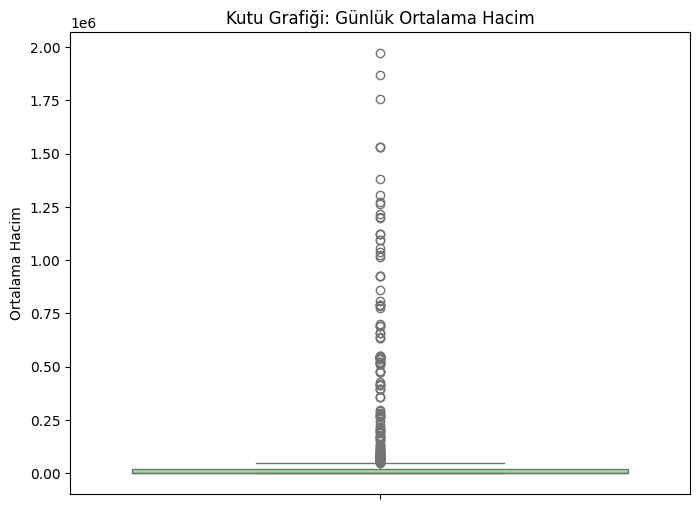

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='avg_volume_in_one_day', data=train_x, color='lightgreen')
plt.title('Kutu Grafiği: Günlük Ortalama Hacim')
plt.ylabel('Ortalama Hacim')
plt.show()

In [121]:
train_x.drop(train_x[train_x["avg_volume_in_one_day"] > 1.5 * 1e6].index, inplace=True)

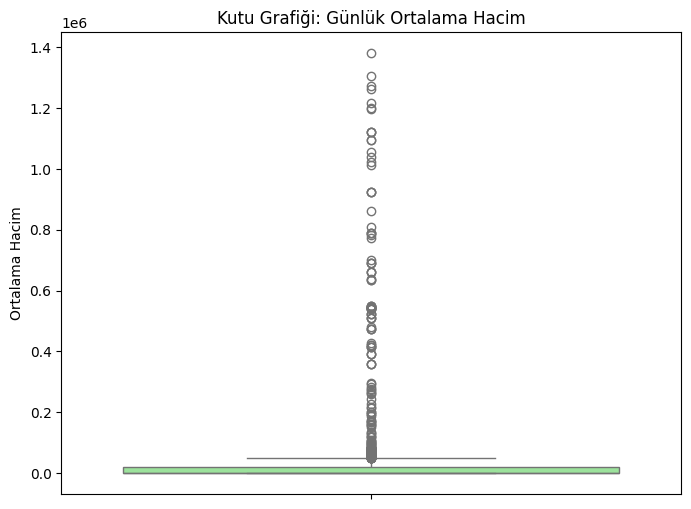

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='avg_volume_in_one_day', data=train_x, color='lightgreen')
plt.title('Kutu Grafiği: Günlük Ortalama Hacim')
plt.ylabel('Ortalama Hacim')
plt.show()

In [123]:
train_x.count()

timestampp               3250
open_price               3250
high_price               3250
low_price                3250
close_price              3250
volume                   3250
avg_volume_in_one_day    3250
sum_volume_in_one_day    3250
avg_salary_one_day       3250
dtype: int64